**Imports necessários para o funcionamento do código:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set_theme(style="whitegrid")

Carregando a base de dados:

In [ ]:
df = pd.read_csv('job_skills.csv')

Função para extrair a senioridade do link:

In [ ]:
def puxar_senioridade(texto):
  texto = texto.lower()
  if "senior" in texto or "sr" in texto or "lead" in texto or "principal" in texto:
    return "senior"
  elif "junior" in texto or "jr" in texto or "entry" in texto:
    return "junior"
  elif "mid" in texto or "pleno" in texto or "mid-level" in texto:
    return "pleno"
  return None

Aplicando a função, binarizando a senioridade, excluindo vagas sem senioridade e criando a váriavel alvo:

In [ ]:
df["senioridade"] = df["job_link"].apply(puxar_senioridade)
df = df.dropna(subset=["senioridade"])

df = df[df["senioridade"].isin(["junior", "senior"])]

df["senioridade"] = df["senioridade"].str.lower().str.strip()
mapa = {"junior": 0, "senior": 1}
df["target"] = df["senioridade"].map(mapa)
df = df.dropna(subset=["target"])

Transformando skills em variáveis binárias:

In [ ]:
#Separando as skills em uma coluna
df["skills_list"] = df["job_skills"].str.lower().str.split(",")
df["skills_list"] = df["skills_list"].apply(lambda x: [s.strip() for s in x])

Definindo o X (As skills de cada vaga):

In [ ]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(df["skills_list"])
feature_names = mlb.classes_

Definindo o y(variável alvo) e dividindo entre treino e teste:

In [ ]:
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=42,
    stratify=y)

Treinando o modelo de Regressão Logística:

In [ ]:
model = LogisticRegression(max_iter=2000)

model.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

Fazendo as previsões e apresentando as métricas:

In [ ]:
y_pred = model.predict(x_test)

print("ACURÁCIA:", accuracy_score(y_test, y_pred))
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n", classification_report(y_test, y_pred))
print("\nMATRIZ DE CONFUSÃO:\n", confusion_matrix(y_test, y_pred))

ACURÁCIA: 0.976303317535545

RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       100
           1       0.98      1.00      0.99      1377

    accuracy                           0.98      1477
   macro avg       0.95      0.85      0.89      1477
weighted avg       0.98      0.98      0.97      1477


MATRIZ DE CONFUSÃO:
 [[  71   29]
 [   6 1371]]


Interpretando os coeficientes:

In [ ]:
coefs = model.coef_

senior_coefs = coefs[0]

top_20_indices = np.argsort(senior_coefs)[-20:]

bottom_20_indices = np.argsort(senior_coefs)[:20]

print("Top 20 habilidades para cargos Senior (coeficientes mais positivos):")
for i in top_20_indices:
  print(f"{feature_names[i]}: {senior_coefs[i]:.2f}")

print("\nTop 20 habilidades para cargos Junior (coeficientes mais negativos):")
for i in bottom_20_indices:
  print(f"{feature_names[i]}: {senior_coefs[i]:.2f}")

Top 20 habilidades para cargos Senior (coeficientes mais positivos):
data extraction: 0.53
adobe: 0.53
nosql: 0.54
data ingestion: 0.54
bachelor's degree: 0.54
sql server: 0.55
distributed systems: 0.55
jira: 0.57
leadership: 0.59
ssrs: 0.62
project management: 0.63
mentoring: 0.64
data reporting: 0.65
machine learning: 0.68
economics: 0.68
training: 0.69
monitoring: 0.74
pytorch: 0.76
dashboards: 0.77
snowflake: 0.82

Top 20 habilidades para cargos Junior (coeficientes mais negativos):
data entry: -3.89
hypothesis testing: -1.91
a/b testing: -1.67
linkedin for good: -1.22
volunteermatch: -1.22
data accuracy: -1.10
computer skills: -1.08
problemsolving skills: -1.02
etl processes: -0.92
administrative support: -0.82
cloud computing platforms: -0.80
nlp: -0.77
team player: -0.76
big data frameworks: -0.75
django: -0.73
elt: -0.73
typing: -0.73
data reliability: -0.73
text mining: -0.73
case management: -0.73


/tmp/ipython-input-50353272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values, y=top_skills, palette="Reds")


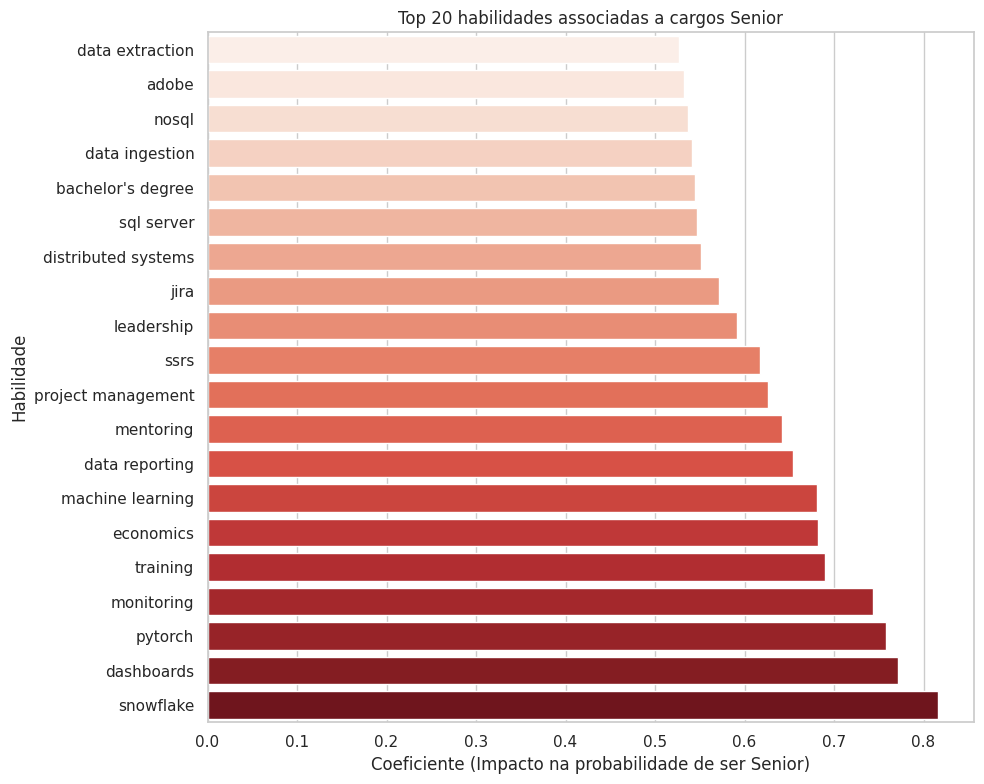

In [ ]:
top_skills = [feature_names[i] for i in top_20_indices]
top_values = [senior_coefs[i] for i in top_20_indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=top_values, y=top_skills, palette="Reds")
plt.xlabel("Coeficiente (Impacto na probabilidade de ser Senior)")
plt.ylabel("Habilidade")
plt.title("Top 20 habilidades associadas a cargos Senior")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2071197002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_values, y=bottom_skills, palette="Reds")


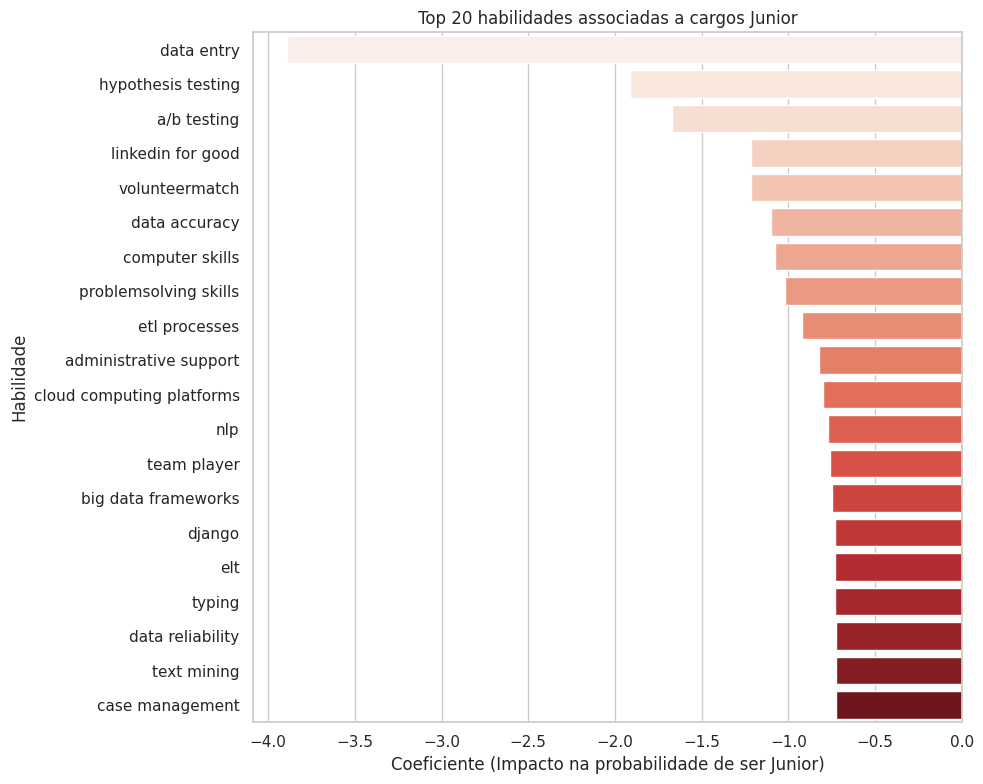

In [ ]:
bottom_skills = [feature_names[i] for i in bottom_20_indices]
bottom_values = [senior_coefs[i] for i in bottom_20_indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=bottom_values, y=bottom_skills, palette="Reds")
plt.xlabel("Coeficiente (Impacto na probabilidade de ser Junior)")
plt.ylabel("Habilidade")
plt.title("Top 20 habilidades associadas a cargos Junior")
plt.tight_layout()
plt.show()

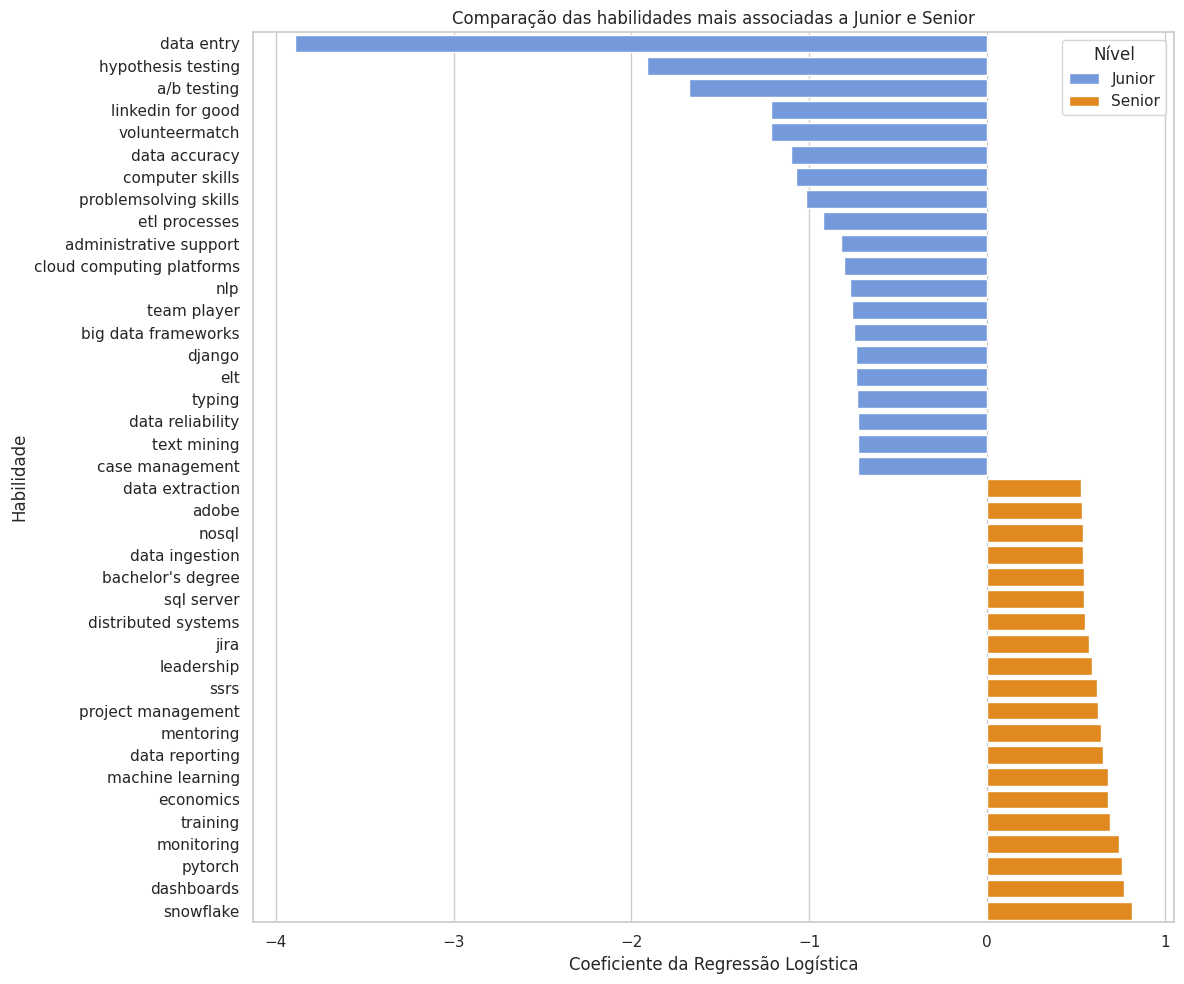

In [ ]:
skills_junior = [feature_names[i] for i in bottom_20_indices]
values_junior = [senior_coefs[i] for i in bottom_20_indices]

skills_senior = [feature_names[i] for i in top_20_indices]
values_senior = [senior_coefs[i] for i in top_20_indices]

df_plot = pd.DataFrame({
    "skill": skills_junior + skills_senior,
    "coef": values_junior + values_senior,
    "group": ["Junior"] * len(skills_junior) + ["Senior"] * len(skills_senior)
})

plt.figure(figsize=(12, 10))
sns.barplot(
    data=df_plot,
    x="coef",
    y="skill",
    hue="group",
    palette={"Junior": "cornflowerblue", "Senior": "darkorange"}
)
plt.xlabel("Coeficiente da Regressão Logística")
plt.ylabel("Habilidade")
plt.title("Comparação das habilidades mais associadas a Junior e Senior")
plt.legend(title="Nível")
plt.tight_layout()
plt.show()

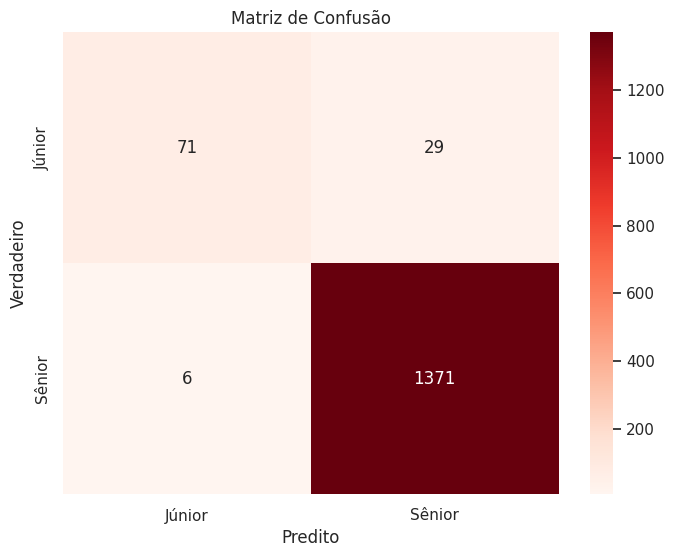

In [ ]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Júnior', 'Sênior']

plt.figure(figsize=(8, 6))

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=labels,
    yticklabels=labels
)

plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

plt.show()